<a href="https://colab.research.google.com/github/aslanidze/Machine_Learning/blob/main/Clus_K_Means_Customer_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
Uploaded = files.upload ()

Saving Cust_Segmentation.csv to Cust_Segmentation.csv


# Load Data From CSV File

In [3]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Pre-processing

In [4]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalizing over the standard deviation

In [5]:
print(df.isnull().sum())


Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [6]:
# بررسی همبستگی ویژگی‌ها با ستون 'Defaulted'
correlations = df.corr()['Defaulted'].sort_values(ascending=False)
print(correlations)



Defaulted          1.000000
DebtIncomeRatio    0.389575
Card Debt          0.244734
Other Debt         0.145716
Edu                0.114676
Customer Id       -0.004244
Income            -0.070970
Age               -0.137657
Years Employed    -0.282978
Name: Defaulted, dtype: float64


The provided text discusses the use of K-Nearest Neighbors (KNN) imputation to handle missing values in a customer segmentation dataset. It highlights the importance of properly addressing missing data to ensure accurate machine learning models, as missing data is a common problem in real-world datasets.bold text

In [8]:
from sklearn.impute import KNNImputer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تقسیم داده به آموزش و تست قبل از ایمپیوت
df_with_defaulted = df[df['Defaulted'].notnull()]  # داده‌های اصلی که Defaulted هستند
df_without_defaulted = df[df['Defaulted'].isnull()]  # داده‌های گمشده برای ایمپیوت

In [11]:
from sklearn.model_selection import train_test_split
# تقسیم داده‌های کامل به آموزش و تست
train, test = train_test_split(df_with_defaulted, test_size=0.2, random_state=42)

# ایمپیوت فقط روی داده آموزش انجام بشه
features = ['DebtIncomeRatio', 'Card Debt', 'Other Debt', 'Years Employed', 'Age']
knn_imputer = KNNImputer(n_neighbors=5)

train_imputed = knn_imputer.fit_transform(train[features])
test_imputed = knn_imputer.transform(test[features])

# تبدیل آرایه به دیتافریم
train_imputed = pd.DataFrame(train_imputed, columns=features, index=train.index)
test_imputed = pd.DataFrame(test_imputed, columns=features, index=test.index)

# اضافه کردن ستون Defaulted اصلی به دیتافریم‌های آموزشی و تست
train_imputed['Defaulted'] = train['Defaulted'].values
test_imputed['Defaulted'] = test['Defaulted'].values


In [13]:
# ایمپیوت روی داده‌های بدون مقدار برای Defaulted
df_without_defaulted_imputed = knn_imputer.transform(df_without_defaulted[features])

# اضافه کردن پیش‌بینی ستون Defaulted به صورت ایمن
df_without_defaulted.loc[:, 'Defaulted'] = df_without_defaulted_imputed[:, 0]
df_without_defaulted.loc[:, 'Defaulted'] = df_without_defaulted['Defaulted'].apply(lambda x: 1 if x >= 0.5 else 0)

# ترکیب داده‌های کامل‌شده
df_final = pd.concat([df_with_defaulted, df_without_defaulted])

<ipython-input-13-091e089e7887>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10.9 15.5  1.6 17.6  9.2 10.8 10.9  8.8 13.5 10.   8.4  6.8 13.1  3.5
  6.2  3.3 15.5  4.4  9.1  5.4 12.2 10.5  0.9  9.4 13.7  3.   9.8  8.1
  5.   1.2 11.  10.3 23.4 15.4 17.2  4.1 12.9  1.1 20.3  0.1 10.6  4.6
  2.6  5.1  1.  23.3 12.1 12.7 10.9  8.1  7.1  2.2  8.5  3.1 13.   7.
  2.9  7.6  1.2 32.5  7.8  5.  32.3  9.6  5.   7.   5.1  4.9 21.3  2.7
  6.7 21.7  9.9  9.6  8.   5.6  6.   6.1 16.8  4.  11.4 28.2 19.  11.4
  9.4 13.9 13.8 15.8  9.6 11.8  6.1  3.7  5.5 10.8  7.8 14.7  7.3  4.1
  2.   8.6 12.9  7.7  5.1 10.5  8.6 15.   9.   5.9  9.3  7.2 15.4  5.4
 12.3 13.9 13.6 12.6 15.4  4.1  5.4  1.3  3.8  4.7 11.2  5.3  6.4  1.5
 15.9 14.7  2.   7.5  5.6 17.  17.6 17.1 10.8  8.7  9.4 32.4  9.8  7.
 16.5  7.4  7.5 10.5  3.8 12.4 14.2  5.7 19.5  6.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

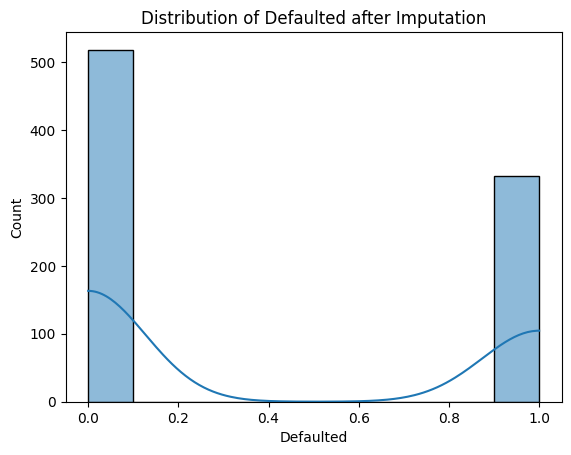

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# بررسی توزیع ستون Defaulted
sns.histplot(df_final['Defaulted'], bins=10, kde=True)
plt.title('Distribution of Defaulted after Imputation')
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ارزیابی دقت پیش‌بینی با Cross-Validation
X = train_imputed[features]
y = train_imputed['Defaulted']

clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}\n")

# ارزیابی دقت روی داده تست
y_true = test['Defaulted']
y_pred = test_imputed['Defaulted']

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))


Cross-Validation Accuracy Scores: [0.79464286 0.82142857 0.79464286 0.82142857 0.79464286]
Mean Accuracy: 0.8053571428571427

Test Accuracy: 1.0
Confusion Matrix:
 [[105   0]
 [  0  35]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


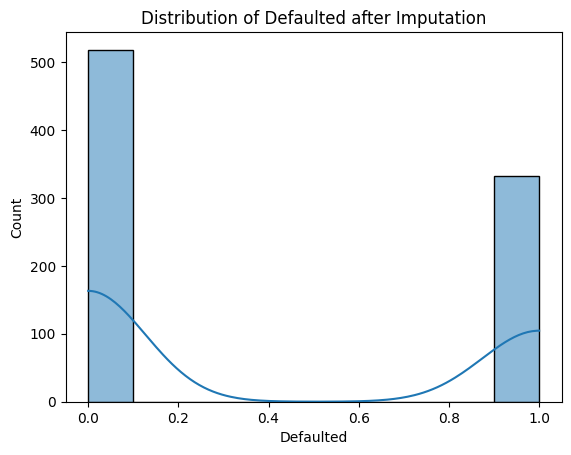

Random Forest - Cross-Validation Accuracy Scores: [0.79464286 0.82142857 0.79464286 0.82142857 0.79464286]
Random Forest - Mean Accuracy: 0.8053571428571427

Logistic Regression - Cross-Validation Accuracy Scores: [0.76785714 0.8125     0.83035714 0.80357143 0.79464286]
Logistic Regression - Mean Accuracy: 0.8017857142857142

Test Accuracy: 1.0
Confusion Matrix:
 [[105   0]
 [  0  35]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# خواندن داده‌ها
df = pd.read_csv('Cust_Segmentation.csv')

# بررسی اولیه
df.info()
print(df.isnull().sum())

# جدا کردن داده‌هایی که ستون Defaulted مقدار دارند و ندارند
df_with_defaulted = df[df['Defaulted'].notnull()].copy()
df_without_defaulted = df[df['Defaulted'].isnull()].copy()

# ویژگی‌ها برای ایمپیوت
features = ['DebtIncomeRatio', 'Card Debt', 'Other Debt', 'Years Employed', 'Age']

# تقسیم داده‌های دارای مقدار Defaulted برای آموزش و تست
train, test = train_test_split(df_with_defaulted, test_size=0.2, random_state=42)

# ایجاد ایمپیوت KNN
knn_imputer = KNNImputer(n_neighbors=5)

# آموزش ایمپیوت روی داده‌های آموزشی
train_imputed = knn_imputer.fit_transform(train[features])
test_imputed = knn_imputer.transform(test[features])

# تبدیل آرایه به دیتافریم
train_imputed = pd.DataFrame(train_imputed, columns=features, index=train.index)
test_imputed = pd.DataFrame(test_imputed, columns=features, index=test.index)

# اضافه کردن ستون Defaulted اصلی به دیتافریم‌های آموزشی و تست
train_imputed['Defaulted'] = train['Defaulted'].values
test_imputed['Defaulted'] = test['Defaulted'].values

# ایمپیوت روی داده‌های بدون مقدار برای Defaulted
df_without_defaulted_imputed = knn_imputer.transform(df_without_defaulted[features])

# اضافه کردن پیش‌بینی ستون Defaulted به صورت ایمن
df_without_defaulted.loc[:, 'Defaulted'] = df_without_defaulted_imputed[:, 0]
df_without_defaulted.loc[:, 'Defaulted'] = df_without_defaulted['Defaulted'].apply(lambda x: 1 if x >= 0.5 else 0)

# ترکیب داده‌های کامل‌شده
df_final = pd.concat([df_with_defaulted, df_without_defaulted])

# بررسی توزیع ستون Defaulted
sns.histplot(df_final['Defaulted'], bins=10, kde=True)
plt.title('Distribution of Defaulted after Imputation')
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.show()

# ارزیابی دقت پیش‌بینی با Cross-Validation
X = train_imputed[features]
y = train_imputed['Defaulted']

# مدل Random Forest
clf_rf = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='accuracy')

print(f"Random Forest - Cross-Validation Accuracy Scores: {scores_rf}")
print(f"Random Forest - Mean Accuracy: {scores_rf.mean()}\n")

# مدل Logistic Regression
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
scores_lr = cross_val_score(clf_lr, X, y, cv=5, scoring='accuracy')

print(f"Logistic Regression - Cross-Validation Accuracy Scores: {scores_lr}")
print(f"Logistic Regression - Mean Accuracy: {scores_lr.mean()}\n")

# ارزیابی دقت روی داده تست
y_true = test['Defaulted']
y_pred = test_imputed['Defaulted']

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

# ذخیره دیتافریم نهایی
df_final.to_csv('Cust_Segmentation_Imputed.csv', index=False)

# Pre-processing

In [24]:
df = df_final.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalizing over the standard deviation

In [25]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.80057894, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.80057894,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.24909606,  1.59755385],
       ...,
       [-0.37694723,  0.31212243,  0.50696349, ..., -0.1453642 ,
         1.24909606, -0.6658708 ],
       [-1.74566822,  1.39059423, -1.26454304, ...,  0.75047924,
         1.24909606,  1.38908053],
       [-0.99909313, -0.76634938, -0.52641532, ..., -0.54721312,
         1.24909606, -0.50207033]])

# Modeling

In [27]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 0 2 2 2 0 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 2 0
 0 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0 0 0 0 2 2 2 1 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 0 1 2 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 2 0 2 2 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0
 0 2 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 1 0 0 0 2 0 2
 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 2 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 

In [28]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [29]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.405239,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.444444,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.333333,10.724590


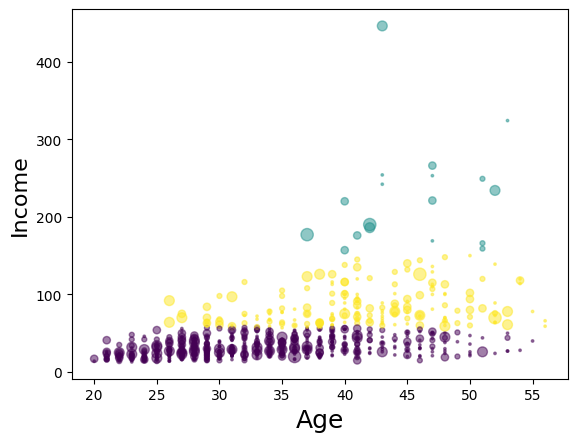

In [31]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

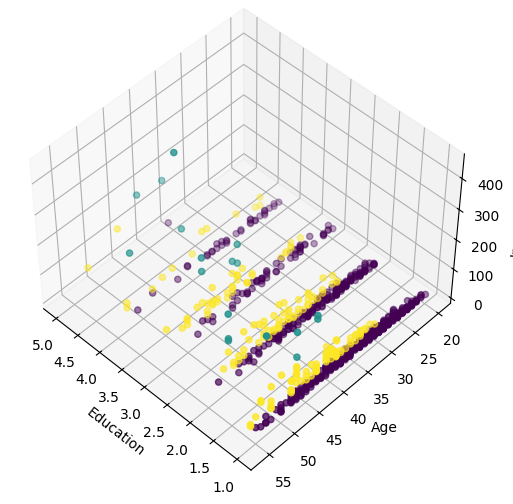

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# فرض می‌کنیم X و labels به درستی تعریف شده باشند.
# اگر نه، باید داده‌ها رو به درستی تنظیم کنی.

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection='3d')  # از این روش برای ساخت subplot استفاده می‌کنیم.
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# رسم نمودار 3D
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))

# تنظیم زاویه دید
ax.view_init(elev=48, azim=134)

# نمایش نمودار
plt.show()
